In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Eng17_18 = pd.read_excel('Football_ENG_2017_18.xlsx')
Eng17_18

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H
...,...,...,...,...,...,...,...
2031,FL2,2018-05-05 00:00:00,Lincoln,Yeovil,1,1,D
2032,FL2,2018-05-05 00:00:00,Mansfield,Crawley Town,1,1,D
2033,FL2,2018-05-05 00:00:00,Notts County,Luton,0,0,D
2034,FL2,2018-05-05 00:00:00,Swindon,Accrington,3,0,H


In [3]:
Eng17_18['HomeWinValue'] = np.where(Eng17_18['FTR'] == 'H', 1, np.where(Eng17_18['FTR'] == 'D', 0.5, 0))
Eng17_18['AwayWinValue'] = np.where(Eng17_18['FTR'] == 'A', 1, np.where(Eng17_18['FTR'] == 'D', 0.5, 0))
Eng17_18['CounterForGames'] = 1
Eng17_18


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeWinValue,AwayWinValue,CounterForGames
0,EPL,2017-11-08 00:00:00,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,EPL,2017-12-08 00:00:00,Brighton,Man City,0,2,A,0.0,1.0,1
2,EPL,2017-12-08 00:00:00,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,EPL,2017-12-08 00:00:00,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,EPL,2017-12-08 00:00:00,Everton,Stoke,1,0,H,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
2031,FL2,2018-05-05 00:00:00,Lincoln,Yeovil,1,1,D,0.5,0.5,1
2032,FL2,2018-05-05 00:00:00,Mansfield,Crawley Town,1,1,D,0.5,0.5,1
2033,FL2,2018-05-05 00:00:00,Notts County,Luton,0,0,D,0.5,0.5,1
2034,FL2,2018-05-05 00:00:00,Swindon,Accrington,3,0,H,1.0,0.0,1


In [4]:
Eng17_18['Date'] = pd.to_datetime(Eng17_18['Date'], errors= 'coerce')
mask2017 = (Eng17_18['Date'].dt.year == 2017)
mask2018 = (Eng17_18['Date'].dt.year == 2018)
games2017 = Eng17_18[mask2017]
games2018 = Eng17_18[mask2018]
display(games2017)
display(games2018)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeWinValue,AwayWinValue,CounterForGames
0,EPL,2017-11-08,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,EPL,2017-12-08,Brighton,Man City,0,2,A,0.0,1.0,1
2,EPL,2017-12-08,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,EPL,2017-12-08,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,EPL,2017-12-08,Everton,Stoke,1,0,H,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1777,FL2,2017-12-30,Grimsby,Accrington,0,3,A,0.0,1.0,1
1778,FL2,2017-12-30,Lincoln,Forest Green,2,1,H,1.0,0.0,1
1779,FL2,2017-12-30,Port Vale,Luton,4,0,H,1.0,0.0,1
1780,FL2,2017-12-30,Swindon,Notts County,1,0,H,1.0,0.0,1


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HomeWinValue,AwayWinValue,CounterForGames
209,EPL,2018-01-01,Brighton,Bournemouth,2,2,D,0.5,0.5,1
210,EPL,2018-01-01,Burnley,Liverpool,1,2,A,0.0,1.0,1
211,EPL,2018-01-01,Everton,Man United,0,2,A,0.0,1.0,1
212,EPL,2018-01-01,Leicester,Huddersfield,3,0,H,1.0,0.0,1
213,EPL,2018-01-01,Stoke,Newcastle,0,1,A,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
2031,FL2,2018-05-05,Lincoln,Yeovil,1,1,D,0.5,0.5,1
2032,FL2,2018-05-05,Mansfield,Crawley Town,1,1,D,0.5,0.5,1
2033,FL2,2018-05-05,Notts County,Luton,0,0,D,0.5,0.5,1
2034,FL2,2018-05-05,Swindon,Accrington,3,0,H,1.0,0.0,1


In [5]:
HomeTeam17 = games2017.groupby(['HomeTeam','Div'])[['CounterForGames', 'HomeWinValue' , 'FTHG', 'FTAG']].sum().reset_index()
HomeTeam17 = HomeTeam17.rename(columns={'HomeTeam': 'Team', 'CounterForGames': 'HomeGamesPlayed','FTHG': 'HomeGoalsFor', 'FTAG': 'HomeGoalsAgainst'})
HomeTeam17

,Team,Div,HomeGamesPlayed,HomeWinValue,HomeGoalsFor,HomeGoalsAgainst
0,AFC Wimbledon,FL1,12,4.5,11,17
1,Accrington,FL2,11,7.0,19,12
2,Arsenal,EPL,10,8.5,25,10
3,Aston Villa,FLCH,12,8.5,17,10
4,Barnet,FL2,12,4.5,10,14
...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14
88,Wigan,FL1,13,10.0,21,4
89,Wolves,FLCH,12,10.0,25,10
90,Wycombe,FL2,13,8.5,27,18


In [6]:
AwayTeam17 = games2017.groupby('AwayTeam')[['CounterForGames', 'AwayWinValue', 'FTHG', 'FTAG']].sum().reset_index()
AwayTeam17 = AwayTeam17.rename(columns={'AwayTeam': 'Team', 'CounterForGames': 'AwayGamesPlayed','FTHG': 'AwayGoalsFor', 'FTAG': 'AwayGoalsAgainst'})
AwayTeam17

,Team,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst
0,AFC Wimbledon,12,4.5,14,9
1,Accrington,13,7.0,18,19
2,Arsenal,11,5.0,16,13
3,Aston Villa,13,6.5,14,16
4,Barnet,13,3.0,23,15
...,...,...,...,...,...
87,West Ham,11,3.0,24,12
88,Wigan,11,8.5,8,28
89,Wolves,13,10.0,10,22
90,Wycombe,12,6.0,16,17


In [7]:
#Merge the HomeTeam17 and AwayTeam17 dataframes

Eng17 = pd.merge(HomeTeam17, AwayTeam17, on = 'Team')
Eng17

,Team,Div,HomeGamesPlayed,HomeWinValue,HomeGoalsFor,HomeGoalsAgainst,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst
0,AFC Wimbledon,FL1,12,4.5,11,17,12,4.5,14,9
1,Accrington,FL2,11,7.0,19,12,13,7.0,18,19
2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13
3,Aston Villa,FLCH,12,8.5,17,10,13,6.5,14,16
4,Barnet,FL2,12,4.5,10,14,13,3.0,23,15
...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14,11,3.0,24,12
88,Wigan,FL1,13,10.0,21,4,11,8.5,8,28
89,Wolves,FLCH,12,10.0,25,10,13,10.0,10,22
90,Wycombe,FL2,13,8.5,27,18,12,6.0,16,17


In [8]:
#Calculate the overall team performance. 
#Sum the values of home and away wins, games, goals for and goals against

Eng17['Wins'] = Eng17['HomeWinValue'] + Eng17['AwayWinValue']
Eng17['TotalGames'] = Eng17['HomeGamesPlayed'] +Eng17['AwayGamesPlayed']
Eng17['GoalsFor'] = Eng17['HomeGoalsFor'] + Eng17['AwayGoalsAgainst']
Eng17['GoalsAgainst'] = Eng17['HomeGoalsAgainst'] + Eng17['AwayGoalsFor']

Eng17

,Team,Div,HomeGamesPlayed,HomeWinValue,HomeGoalsFor,HomeGoalsAgainst,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst,Wins,TotalGames,GoalsFor,GoalsAgainst
0,AFC Wimbledon,FL1,12,4.5,11,17,12,4.5,14,9,9.0,24,20,31
1,Accrington,FL2,11,7.0,19,12,13,7.0,18,19,14.0,24,38,30
2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26
3,Aston Villa,FLCH,12,8.5,17,10,13,6.5,14,16,15.0,25,33,24
4,Barnet,FL2,12,4.5,10,14,13,3.0,23,15,7.5,25,25,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14,11,3.0,24,12,7.0,20,22,38
88,Wigan,FL1,13,10.0,21,4,11,8.5,8,28,18.5,24,49,12
89,Wolves,FLCH,12,10.0,25,10,13,10.0,10,22,20.0,25,47,20
90,Wycombe,FL2,13,8.5,27,18,12,6.0,16,17,14.5,25,44,34


In [9]:
# Create the values for win percentage and Pythagorean Expectation

Eng17['Winpercentage'] = Eng17['Wins'] / Eng17['TotalGames']
Eng17['PythagoreanExpectation'] = Eng17['GoalsFor']**2 / (Eng17['GoalsFor']**2 + Eng17['GoalsAgainst']**2)
Eng17

,Team,Div,HomeGamesPlayed,HomeWinValue,HomeGoalsFor,HomeGoalsAgainst,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst,Wins,TotalGames,GoalsFor,GoalsAgainst,Winpercentage,PythagoreanExpectation
0,AFC Wimbledon,FL1,12,4.5,11,17,12,4.5,14,9,9.0,24,20,31,0.375000,0.293902
1,Accrington,FL2,11,7.0,19,12,13,7.0,18,19,14.0,24,38,30,0.583333,0.616041
2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132
3,Aston Villa,FLCH,12,8.5,17,10,13,6.5,14,16,15.0,25,33,24,0.600000,0.654054
4,Barnet,FL2,12,4.5,10,14,13,3.0,23,15,7.5,25,25,37,0.300000,0.313440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14,11,3.0,24,12,7.0,20,22,38,0.350000,0.251037
88,Wigan,FL1,13,10.0,21,4,11,8.5,8,28,18.5,24,49,12,0.770833,0.943418
89,Wolves,FLCH,12,10.0,25,10,13,10.0,10,22,20.0,25,47,20,0.800000,0.846685
90,Wycombe,FL2,13,8.5,27,18,12,6.0,16,17,14.5,25,44,34,0.580000,0.626132


In [10]:
HomeTeam18 = games2018.groupby(['HomeTeam','Div'])[['CounterForGames', 'HomeWinValue' , 'FTHG', 'FTAG']].sum().reset_index()
HomeTeam18 = HomeTeam18.rename(columns={'HomeTeam': 'Team', 'CounterForGames': 'HomeGamesPlayed18','HomeWinValue': 'HomeWinValue18' ,'FTHG': 'HomeGoalsFor18', 'FTAG': 'HomeGoalsAgainst18'})
display(HomeTeam18)

AwayTeam18 = games2018.groupby('AwayTeam')[['CounterForGames', 'AwayWinValue', 'FTHG', 'FTAG']].sum().reset_index()
AwayTeam18 = AwayTeam18.rename(columns={'AwayTeam': 'Team', 'CounterForGames': 'AwayGamesPlayed18','AwayWinValue': 'AwayWinValue18' ,'FTHG': 'AwayGoalsFor18', 'FTAG': 'AwayGoalsAgainst18'})
display(AwayTeam18)

,Team,Div,HomeGamesPlayed18,HomeWinValue18,HomeGoalsFor18,HomeGoalsAgainst18
0,AFC Wimbledon,FL1,11,6.5,14,13
1,Accrington,FL2,12,11.5,23,7
2,Arsenal,EPL,9,7.5,29,10
3,Aston Villa,FLCH,11,9.0,25,9
4,Barnet,FL2,11,6.5,14,11
...,...,...,...,...,...,...
87,West Ham,EPL,10,6.0,14,12
88,Wigan,FL1,10,7.0,16,7
89,Wolves,FLCH,11,8.5,22,8
90,Wycombe,FL2,10,6.0,16,17


,Team,AwayGamesPlayed18,AwayWinValue18,AwayGoalsFor18,AwayGoalsAgainst18
0,AFC Wimbledon,11,4.5,14,13
1,Accrington,10,6.5,9,15
2,Arsenal,8,1.0,15,7
3,Aston Villa,10,5.5,9,14
4,Barnet,10,3.0,17,7
...,...,...,...,...,...
87,West Ham,8,3.0,18,12
88,Wigan,12,9.0,10,24
89,Wolves,10,6.0,11,13
90,Wycombe,11,9.5,9,19


In [11]:
Eng18 = pd.merge(HomeTeam18, AwayTeam18, on = 'Team')
Eng18 

,Team,Div,HomeGamesPlayed18,HomeWinValue18,HomeGoalsFor18,HomeGoalsAgainst18,AwayGamesPlayed18,AwayWinValue18,AwayGoalsFor18,AwayGoalsAgainst18
0,AFC Wimbledon,FL1,11,6.5,14,13,11,4.5,14,13
1,Accrington,FL2,12,11.5,23,7,10,6.5,9,15
2,Arsenal,EPL,9,7.5,29,10,8,1.0,15,7
3,Aston Villa,FLCH,11,9.0,25,9,10,5.5,9,14
4,Barnet,FL2,11,6.5,14,11,10,3.0,17,7
...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,10,6.0,14,12,8,3.0,18,12
88,Wigan,FL1,10,7.0,16,7,12,9.0,10,24
89,Wolves,FLCH,11,8.5,22,8,10,6.0,11,13
90,Wycombe,FL2,10,6.0,16,17,11,9.5,9,19


In [12]:
Eng18['Wins18'] = Eng18['HomeWinValue18'] + Eng18['AwayWinValue18']
Eng18['TotalGames18'] = Eng18['HomeGamesPlayed18'] + Eng18['AwayGamesPlayed18']
Eng18['GoalsFor18'] = Eng18['HomeGoalsFor18'] + Eng18['AwayGoalsAgainst18']
Eng18['GoalsAgainst18'] = Eng18['HomeGoalsAgainst18'] + Eng18['AwayGoalsFor18']
Eng18

,Team,Div,HomeGamesPlayed18,HomeWinValue18,HomeGoalsFor18,HomeGoalsAgainst18,AwayGamesPlayed18,AwayWinValue18,AwayGoalsFor18,AwayGoalsAgainst18,Wins18,TotalGames18,GoalsFor18,GoalsAgainst18
0,AFC Wimbledon,FL1,11,6.5,14,13,11,4.5,14,13,11.0,22,27,27
1,Accrington,FL2,12,11.5,23,7,10,6.5,9,15,18.0,22,38,16
2,Arsenal,EPL,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25
3,Aston Villa,FLCH,11,9.0,25,9,10,5.5,9,14,14.5,21,39,18
4,Barnet,FL2,11,6.5,14,11,10,3.0,17,7,9.5,21,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,10,6.0,14,12,8,3.0,18,12,9.0,18,26,30
88,Wigan,FL1,10,7.0,16,7,12,9.0,10,24,16.0,22,40,17
89,Wolves,FLCH,11,8.5,22,8,10,6.0,11,13,14.5,21,35,19
90,Wycombe,FL2,10,6.0,16,17,11,9.5,9,19,15.5,21,35,26


In [13]:
# Create the values for win percentage and Pythagorean Expectation

Eng18['Winpercentage18'] = Eng18['Wins18'] / Eng18['TotalGames18']
Eng18['PythagoreanExpectation18'] = Eng18['GoalsFor18']**2 / (Eng18['GoalsFor18']**2 + Eng18['GoalsAgainst18']**2)
Eng18

,Team,Div,HomeGamesPlayed18,HomeWinValue18,HomeGoalsFor18,HomeGoalsAgainst18,AwayGamesPlayed18,AwayWinValue18,AwayGoalsFor18,AwayGoalsAgainst18,Wins18,TotalGames18,GoalsFor18,GoalsAgainst18,Winpercentage18,PythagoreanExpectation18
0,AFC Wimbledon,FL1,11,6.5,14,13,11,4.5,14,13,11.0,22,27,27,0.500000,0.500000
1,Accrington,FL2,12,11.5,23,7,10,6.5,9,15,18.0,22,38,16,0.818182,0.849412
2,Arsenal,EPL,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
3,Aston Villa,FLCH,11,9.0,25,9,10,5.5,9,14,14.5,21,39,18,0.690476,0.824390
4,Barnet,FL2,11,6.5,14,11,10,3.0,17,7,9.5,21,21,28,0.452381,0.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,10,6.0,14,12,8,3.0,18,12,9.0,18,26,30,0.500000,0.428934
88,Wigan,FL1,10,7.0,16,7,12,9.0,10,24,16.0,22,40,17,0.727273,0.847009
89,Wolves,FLCH,11,8.5,22,8,10,6.0,11,13,14.5,21,35,19,0.690476,0.772383
90,Wycombe,FL2,10,6.0,16,17,11,9.5,9,19,15.5,21,35,26,0.738095,0.644398


In [14]:
MergedEng17_18 = pd.merge(Eng17, Eng18, on = 'Team')
MergedEng17_18

,Team,Div_x,HomeGamesPlayed,HomeWinValue,HomeGoalsFor,HomeGoalsAgainst,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst,...,AwayGamesPlayed18,AwayWinValue18,AwayGoalsFor18,AwayGoalsAgainst18,Wins18,TotalGames18,GoalsFor18,GoalsAgainst18,Winpercentage18,PythagoreanExpectation18
0,AFC Wimbledon,FL1,12,4.5,11,17,12,4.5,14,9,...,11,4.5,14,13,11.0,22,27,27,0.500000,0.500000
1,Accrington,FL2,11,7.0,19,12,13,7.0,18,19,...,10,6.5,9,15,18.0,22,38,16,0.818182,0.849412
2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13,...,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
3,Aston Villa,FLCH,12,8.5,17,10,13,6.5,14,16,...,10,5.5,9,14,14.5,21,39,18,0.690476,0.824390
4,Barnet,FL2,12,4.5,10,14,13,3.0,23,15,...,10,3.0,17,7,9.5,21,21,28,0.452381,0.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14,11,3.0,24,12,...,8,3.0,18,12,9.0,18,26,30,0.500000,0.428934
88,Wigan,FL1,13,10.0,21,4,11,8.5,8,28,...,12,9.0,10,24,16.0,22,40,17,0.727273,0.847009
89,Wolves,FLCH,12,10.0,25,10,13,10.0,10,22,...,10,6.0,11,13,14.5,21,35,19,0.690476,0.772383
90,Wycombe,FL2,13,8.5,27,18,12,6.0,16,17,...,11,9.5,9,19,15.5,21,35,26,0.738095,0.644398


c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

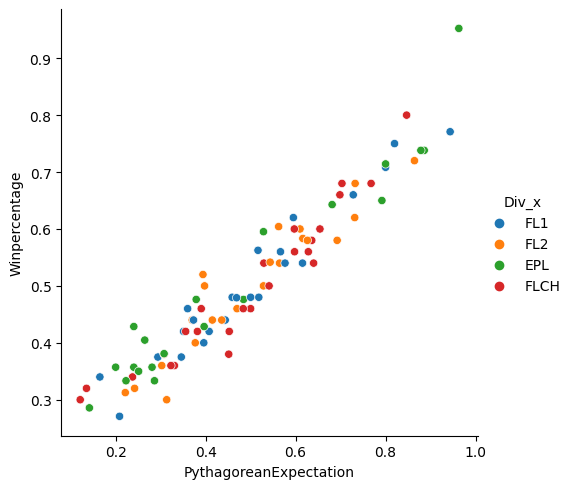

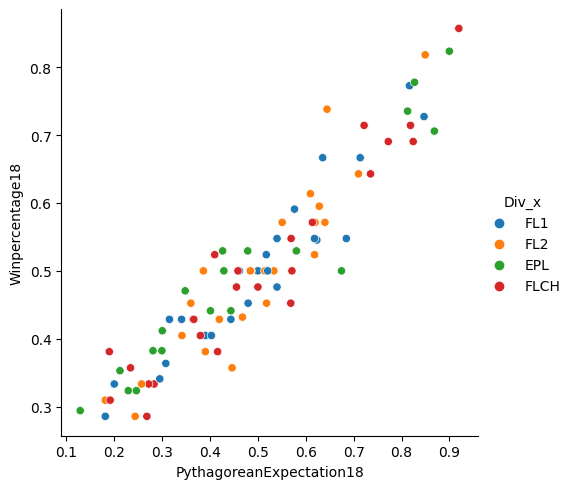

In [15]:
# Correlation

# To visualize the correlation between win percentage and the Pythagorean Expectation, we can use the Seaborn package to create an XY plot.
# By plotting the win percentage on the x-axis and the Pythagorean Expectation on the y-axis, we can observe the relationship between these two variables. 
# If there is a close correlation, the points on the plot will generally fall along a straight line, indicating that the Pythagorean Expectation is a good predictor of a team's win percentage.
# We can use Seaborn's plotting functions, such as sns.scatterplot(), to generate the XY plot and examine the correlation between win percentage and the Pythagorean Expectation.

# Plot the data, color coding teams based on division
sns.relplot(x="PythagoreanExpectation", y="Winpercentage", data=MergedEng17_18, hue='Div_x')
sns.relplot(x="PythagoreanExpectation18", y="Winpercentage18", data=MergedEng17_18, hue='Div_x')

c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

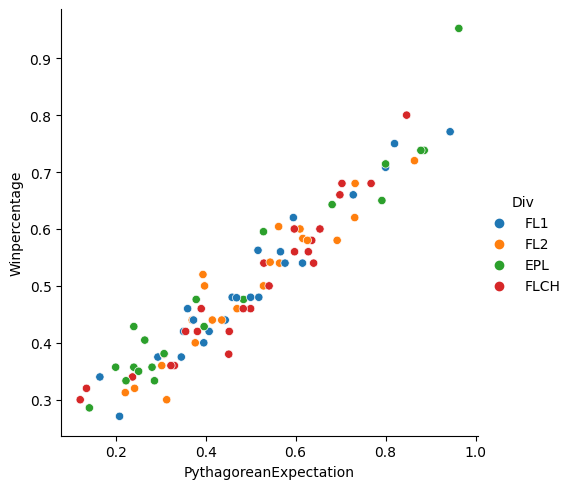

In [103]:
#Correlation for wpc and pyth variables for the first half of the season. (2017)
sns.relplot(x="PythagoreanExpectation", y="Winpercentage", data=Eng17, hue='Div')

c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

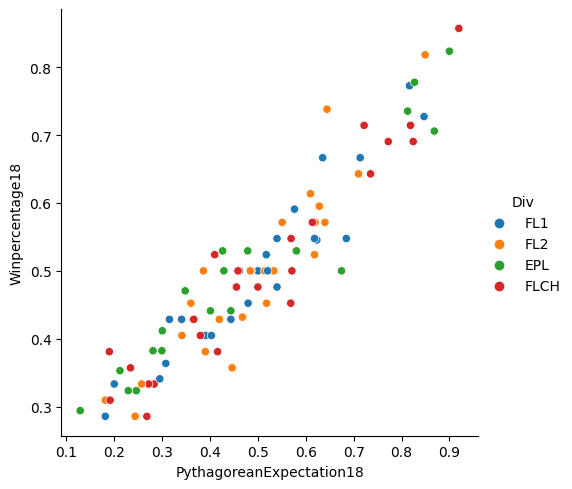

In [105]:
#Correlation for wpc and pyth variables for the second half of the season. (2018)
sns.relplot(x="PythagoreanExpectation18", y="Winpercentage18", data=Eng18, hue='Div')

In [16]:
#Question 1: How many EPL games from this season were played in 2018?
EPLGames = (games2018['Div'] == 'EPL').sum()
print("In 2018",EPLGames, "EPL games were played.")

In 2018 171 EPL games were played.


In [77]:
#Question2 : Which team scored the highest number of goals while playing at home in the first half of the season? 

#List of team names to find
HomeTeams_to_find = ["Liverpool", "Man City", "Watford", "Stoke"]

#Initialize an empty Dataframe to store the results
HomeTeams_to_check_df = pd.DataFrame()

# Iterate through the list of team names
for hometeam in HomeTeams_to_find:
    HomeTeam_data = HomeTeam17.loc[HomeTeam17['Team'] == hometeam]
    HomeTeams_to_check_df = pd.concat([HomeTeams_to_check_df,HomeTeam_data])

# Displaying the DataFrame
HomeTeams_to_check_df = HomeTeams_to_check_df.reset_index()
display(HomeTeams_to_check_df)

# Find the row index of the maximum element in the 'HomeGoalsFor' column
max_goal_index = HomeTeams_to_check_df['HomeGoalsFor'].idxmax()

# Get the team's name corresponding to the maximum goal
team_with_max_goal = HomeTeams_to_check_df.loc[max_goal_index, 'Team']

print("The team with the highest number of goals while playing at home in the first half of the season is:", team_with_max_goal)




,index,Team,Div,HomeGamesPlayed,HomeWinValue,HomeGoalsFor,HomeGoalsAgainst
0,46,Liverpool,EPL,11,8.5,21,4
1,48,Man City,EPL,10,9.5,36,7
2,85,Watford,EPL,11,4.5,14,23
3,79,Stoke,EPL,10,5.0,13,19


The team with the highest number of goals while playing at home in the first half of the season is: Man City


In [80]:
# Question 3: Which team conceded the highest number of goals while playing away in the first half of the season? 

AwayTeams_to_find = ["Stoke","Liverpool","Watford","West Ham"]

AwayTeams_to_check_df = pd.DataFrame()

for awayteam in AwayTeams_to_find:
    AwayTeam_data = AwayTeam17.loc[AwayTeam17['Team'] == awayteam]
    AwayTeams_to_check_df = pd.concat([AwayTeams_to_check_df, AwayTeam_data])

AwayTeams_to_check_df = AwayTeams_to_check_df.reset_index()
display(AwayTeams_to_check_df)

max_goal_conceded_index = AwayTeams_to_check_df['AwayGoalsAgainst'].idxmax()
team_with_max_conc_goals = AwayTeams_to_check_df.loc[max_goal_conceded_index, 'Team']
print("The team with the highest number of conceded goals while playing away in the first half of the season is:", team_with_max_conc_goals)


,index,Team,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst
0,79,Stoke,11,2.5,27,10
1,46,Liverpool,10,6.5,20,27
2,85,Watford,10,4.5,14,16
3,87,West Ham,11,3.0,24,12


The team with the highest number of conceded goals while playing away in the first half of the season is: Liverpool


In [93]:
# Question 4:Which of the following teams had the smallest difference between their win percentage and Pythagorean expectation in the first half of the season? 

#Calculating the absolute difference between the two values and making a new coloumn for them
Eng17['Diff'] = abs(Eng17['Winpercentage'] - Eng17['PythagoreanExpectation'])
display(Eng17)

teams_to_find_1 = ["Liverpool","Arsenal","Man City","Man United"]

Teams_to_check_df1 = pd.DataFrame()

for team in teams_to_find_1:
    Team_data_1 = Eng17.loc[Eng17['Team'] == team]
    Teams_to_check_df1 = pd.concat([Teams_to_check_df1, Team_data_1])


Teams_to_check_df1 = Teams_to_check_df1.reset_index()
display(Teams_to_check_df1)

min_diff_index = Teams_to_check_df1['Diff'].idxmin()
team_with_min_diff = Teams_to_check_df1.loc[min_diff_index, 'Team']
print("The team with the smallest difference between their win percentage and Pythagorean expectation in the first half of the season is: ",team_with_min_diff)


,Team,Div,HomeGamesPlayed,HomeWinValue,HomeGoalsFor,HomeGoalsAgainst,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst,Wins,TotalGames,GoalsFor,GoalsAgainst,Winpercentage,PythagoreanExpectation,Diff
0,AFC Wimbledon,FL1,12,4.5,11,17,12,4.5,14,9,9.0,24,20,31,0.375000,0.293902,0.081098
1,Accrington,FL2,11,7.0,19,12,13,7.0,18,19,14.0,24,38,30,0.583333,0.616041,0.032708
2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132,0.038275
3,Aston Villa,FLCH,12,8.5,17,10,13,6.5,14,16,15.0,25,33,24,0.600000,0.654054,0.054054
4,Barnet,FL2,12,4.5,10,14,13,3.0,23,15,7.5,25,25,37,0.300000,0.313440,0.013440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,West Ham,EPL,9,4.0,10,14,11,3.0,24,12,7.0,20,22,38,0.350000,0.251037,0.098963
88,Wigan,FL1,13,10.0,21,4,11,8.5,8,28,18.5,24,49,12,0.770833,0.943418,0.172585
89,Wolves,FLCH,12,10.0,25,10,13,10.0,10,22,20.0,25,47,20,0.800000,0.846685,0.046685
90,Wycombe,FL2,13,8.5,27,18,12,6.0,16,17,14.5,25,44,34,0.580000,0.626132,0.046132


,index,Team,Div,HomeGamesPlayed,HomeWinValue,HomeGoalsFor,HomeGoalsAgainst,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst,Wins,TotalGames,GoalsFor,GoalsAgainst,Winpercentage,PythagoreanExpectation,Diff
0,46,Liverpool,EPL,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000,0.085714
1,2,Arsenal,EPL,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132,0.038275
2,48,Man City,EPL,10,9.5,36,7,11,10.5,5,25,20.0,21,61,12,0.952381,0.962743,0.010362
3,49,Man United,EPL,11,9.0,24,5,10,6.5,11,19,15.5,21,43,16,0.738095,0.878385,0.140290


The team with the smallest difference between their win percentage and Pythagorean expectation in the first half of the season is:  Man City


In [95]:
# Question 5:Which of the following teams had the smallest difference between their win percentage and Pythagorean expectation in the first half of the season? 
teams_to_find_2 = ["Bournemouth","Leicester","Stoke","Brighton"]

Teams_to_check_df2 = pd.DataFrame()

for team in teams_to_find_2:
    Team_data_2 = Eng17.loc[Eng17['Team'] == team]
    Teams_to_check_df2 = pd.concat([Teams_to_check_df2, Team_data_2])


Teams_to_check_df2 = Teams_to_check_df2.reset_index()
display(Teams_to_check_df2)

min_diff_index2 = Teams_to_check_df2['Diff'].idxmin()
team_with_min_diff2 = Teams_to_check_df2.loc[min_diff_index2, 'Team']
print("The team with the smallest difference between their win percentage and Pythagorean expectation in the first half of the season is: ",team_with_min_diff2)

,index,Team,Div,HomeGamesPlayed,HomeWinValue,HomeGoalsFor,HomeGoalsAgainst,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst,Wins,TotalGames,GoalsFor,GoalsAgainst,Winpercentage,PythagoreanExpectation,Diff
0,10,Bournemouth,EPL,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899,0.076244
1,44,Leicester,EPL,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131,0.007941
2,79,Stoke,EPL,10,5.0,13,19,11,2.5,27,10,7.5,21,23,46,0.357143,0.200000,0.157143
3,13,Brighton,EPL,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706,0.140056


The team with the smallest difference between their win percentage and Pythagorean expectation in the first half of the season is:  Leicester


In [98]:
# Question 6: Which of the following teams had the highest value for away wins (awinvalue) for in the first half of the season? 

teams_to_find_6 = ["Crystal Palace", "Stoke", "West Brom", "West Ham"]
Teams_to_check_df6 = pd.DataFrame()

for team in teams_to_find_6:
    Team_data_6 = AwayTeam17.loc[AwayTeam17['Team'] == team]
    Teams_to_check_df6 = pd.concat([Teams_to_check_df6, Team_data_6])

Teams_to_check_df6 = Teams_to_check_df6.reset_index()
display(Teams_to_check_df6)

max_awinvalue = Teams_to_check_df6['AwayWinValue'].idxmax()
team_with_max_awinvalue = Teams_to_check_df6.loc[max_awinvalue, 'Team']
print("The team with the highest AwayWinValue for the first half of the season is: ", team_with_max_awinvalue)

,index,Team,AwayGamesPlayed,AwayWinValue,AwayGoalsFor,AwayGoalsAgainst
0,30,Crystal Palace,10,2.5,14,4
1,79,Stoke,11,2.5,27,10
2,86,West Brom,10,2.5,13,5
3,87,West Ham,11,3.0,24,12


The team with the highest AwayWinValue for the first half of the season is:  West Ham


In [101]:
#Question 7: Which team had the largest gap between home points won (hwinvalue) and away points won (awinvalue) in the second half the season? 

#Calculating the absolute difference between the two values and making a new coloumn for them
Eng18['Diff_H_A_value'] = abs(Eng18['HomeWinValue18'] - Eng18['AwayWinValue18'])
Eng18

teams_to_find_7 = ["West Ham", "Arsenal", "Watford", "Brighton"]
Teams_to_check_df7 = pd.DataFrame()

for team in teams_to_find_7:
    Team_data_7 = Eng18.loc[Eng18['Team'] == team]
    Teams_to_check_df7 = pd.concat([Teams_to_check_df7, Team_data_7])

Teams_to_check_df7 = Teams_to_check_df7.reset_index()
display(Teams_to_check_df7)

max_diff_value = Teams_to_check_df7['Diff_H_A_value'].idxmax()
team_with_max_diff_value = Teams_to_check_df7.loc[max_diff_value, 'Team']
print("The team with the largest gap between HomeWinValue and AwayWinValue for the second half of the season is: ", team_with_max_diff_value)

,index,Team,Div,HomeGamesPlayed18,HomeWinValue18,HomeGoalsFor18,HomeGoalsAgainst18,AwayGamesPlayed18,AwayWinValue18,AwayGoalsFor18,AwayGoalsAgainst18,Wins18,TotalGames18,GoalsFor18,GoalsAgainst18,Winpercentage18,PythagoreanExpectation18,Diff_H_A_value
0,87,West Ham,EPL,10,6.0,14,12,8,3.0,18,12,9.0,18,26,30,0.500000,0.428934,3.0
1,2,Arsenal,EPL,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649,6.5
2,85,Watford,EPL,8,5.5,13,8,9,0.5,19,1,6.0,17,14,27,0.352941,0.211892,5.0
3,13,Brighton,EPL,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333,4.0


The team with the largest gap between HomeWinValue and AwayWinValue for the second half of the season is:  Arsenal


Correlation between Win Percentage and Pythagorean Expectation: 0.9592098955488119


c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

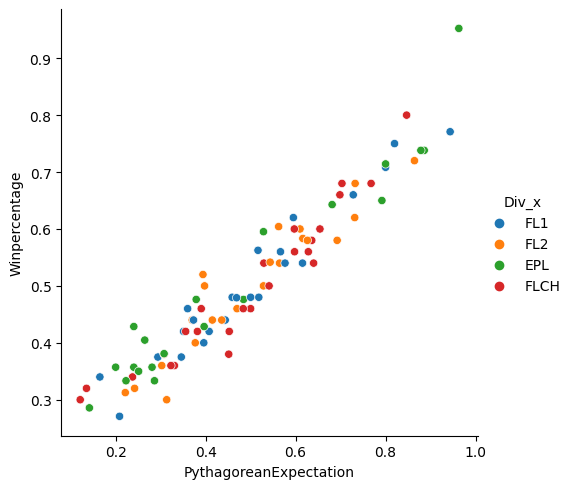

In [126]:
#Question 8: What was the correlation between win percentage and the Pythagorean expectation in the first half of the season? 

# Calculate the correlation coefficient
correlation = Eng17['PythagoreanExpectation'].corr(Eng17['Winpercentage'], method ='pearson')

# Display the correlation coefficient
print("Correlation between Win Percentage and Pythagorean Expectation:", correlation)
sns.relplot(x="PythagoreanExpectation", y="Winpercentage", data=MergedEng17_18, hue='Div_x')




Correlation between Win Percentage and Pythagorean Expectation: 0.6016837093027247


c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

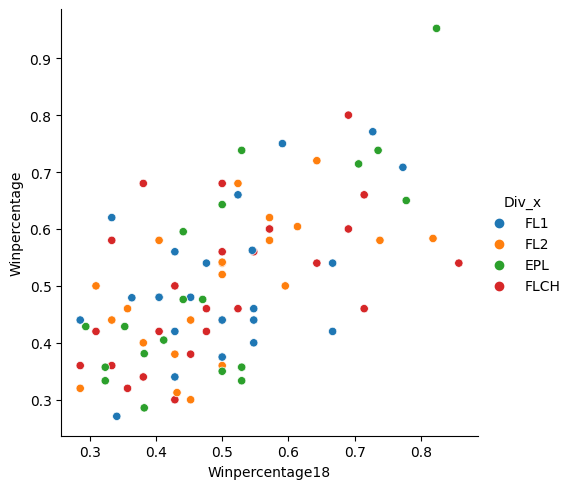

In [123]:
#Question 9: What was the correlation between win percentage in the first half of the season and the second half of the season? 

# Calculate the correlation coefficient
correlation2 = Eng17['Winpercentage'].corr(Eng18['Winpercentage18'], method = 'pearson')

# Display the correlation coefficient
print("Correlation between Win Percentage and Pythagorean Expectation:", correlation2)
sns.relplot(x="Winpercentage18", y="Winpercentage", data=MergedEng17_18, hue='Div_x')


Correlation between Win Percentage and Pythagorean Expectation: 0.6156362788376777


c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Dominik\Documents\PPKE ITK\VSC_Python\env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

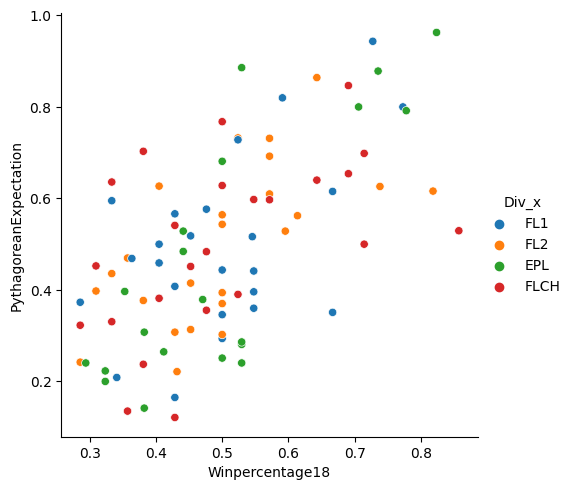

In [138]:
#Question 10: What was the correlation between win percentage in the second half of the season and the Pythagorean expectation in the first half of the season? 

# Calculate the correlation coefficient
correlation3 = Eng18['Winpercentage18'].corr(Eng17['PythagoreanExpectation'], method = 'pearson')

# Display the correlation coefficient
print("Correlation between Win Percentage and Pythagorean Expectation:", correlation3)
sns.relplot(x="Winpercentage18", y="PythagoreanExpectation", data=MergedEng17_18, hue='Div_x')
